# Amazon Top 50 Bestselling Books 2009 - 2019

One of the most important steps of any data science project is to exploring and visualize the data you have collected and cleaned to gain insight.

In this simple Notebook we are going to dive into Amazon Top 50 Bestselling Books 2009 - 2019 dataset, explore and visualize the dataset and see what insights we can collect.

But first let's import the libraries we will work with :
1. _Numpy_ 
2. _Pandas_
3. _Matplotlib_
4. _Seaborn_

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('ggplot')
import seaborn as sns
sns.set_palette('husl')

We then load the dataset CSV file using Pandas function: **read_csv**

In [2]:
df = pd.read_csv("bestsellers with categories.csv")
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


By using another one of the many usefull functions of the Pandas library, **the info() fuction** we can get an overview of how much missing data we have if any, what's the type of each column(feature) and how much rows and columns our data have.

In this particular dataset for example:
1. there are no missing data.
2. the dataset contains 550 rows and 7 columns.

In [4]:
df.describe()

User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

By using the **describe function** we can get some insight to things like the mean user rating and the mean price for a bestseller book.

For example, you should be able to notice that the lowest rated best seller book got a mere ***3.3*** user rating.

# Now let's visualize the dataset

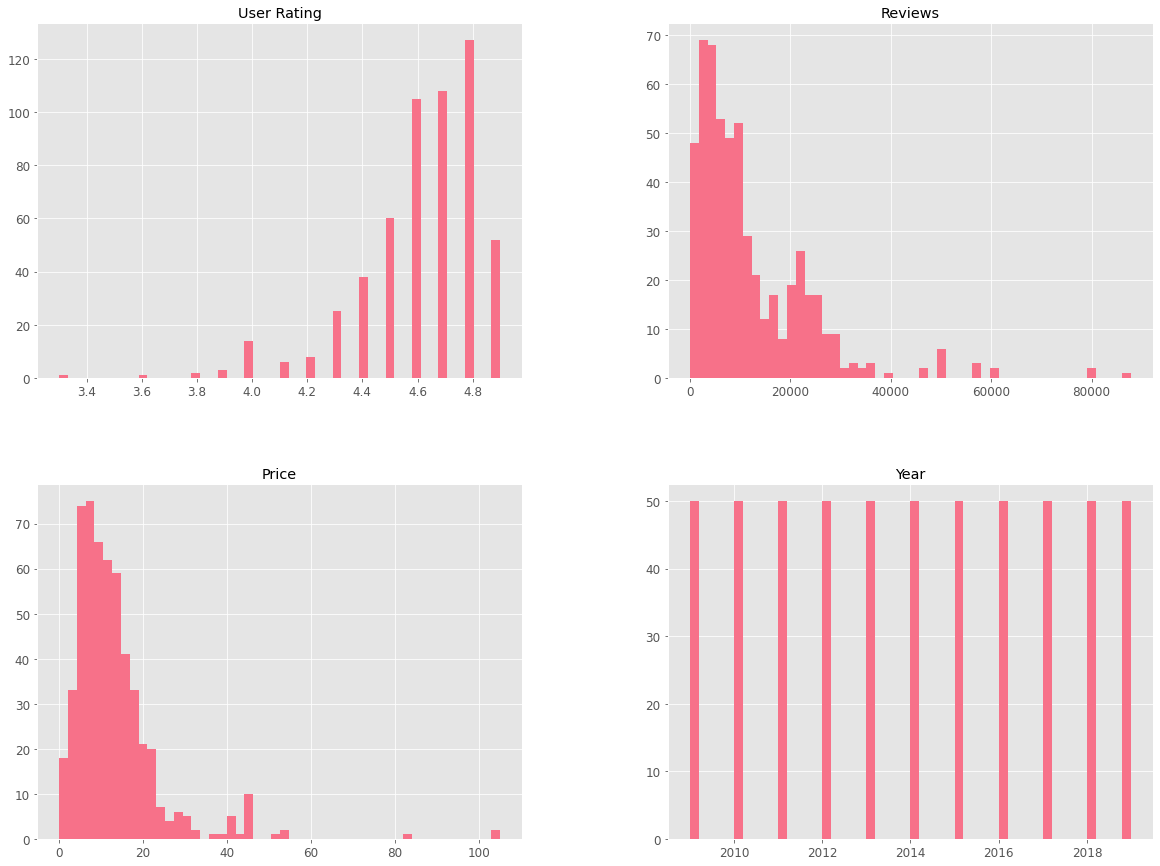

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

**From the graphs above we can see that:**
1. most of the user ratings ranges between 4.6 and 4.8.
2. most of the books got less than 20000 reviews.
3. most of prices ranges from 10 to 20 dollars.

**important notes:** 
1. books prices listed as zero's are probably just filled by zero's instead of NA for convenience but they should be dealt with.
2. Also books with prices like 80 and 100 dollars should be investigated if they are outliers or not.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='User Rating', ylabel='Genre'>

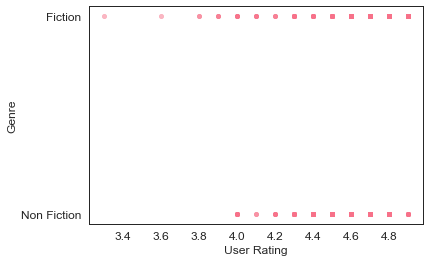

In [15]:
df.plot(kind="scatter", x="User Rating", y="Genre", alpha=0.5)

The graph above shows that the probability for a Non Fiction book to get a user rating less than 4 are less likely compared to their counterparts that got a user rating average as low as 3.3.

In [7]:
df["Genre"].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)')

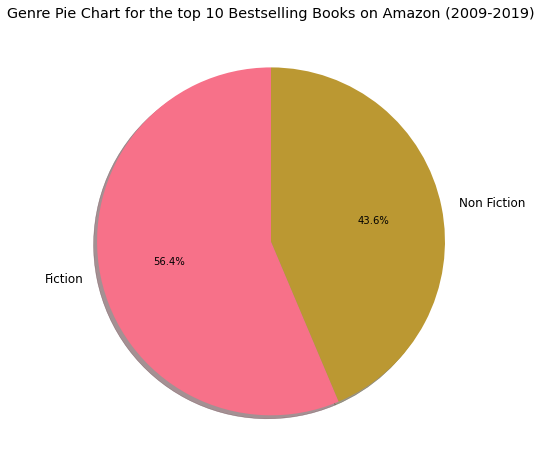

In [8]:
pie = [310, 240]
sns.set_palette("husl")
plt.figure(figsize=(8,8))
plt.pie(pie ,labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)')

**As you can see, even thought Non Fiction books are rated better than Fiction books it doesn't mean that they are more popular.**

In [9]:
df["Author"].value_counts()

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Michael Lewis                          1
Michael Pollan                         1
George W. Bush                         1
Dave Ramsey                            1
Daniel H. Pink                         1
Name: Author, Length: 248, dtype: int64

By using the value counts function from the pandas library we can get an overview of how many books each auther has in the list.

For example, **Jeff kinney** has the most books in the bestsellers dataset with 12 books folowed by **Suzanne Collins, Gary Chapman and Rick Riordan**.

In [10]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author']=='Rick Riordan']

Name        Author  \
264  Percy Jackson and the Olympians Paperback Boxe...  Rick Riordan   
343   The Blood of Olympus (The Heroes of Olympus (5))  Rick Riordan   
406     The House of Hades (Heroes of Olympus, Book 4)  Rick Riordan   
418  The Last Olympian (Percy Jackson and the Olymp...  Rick Riordan   
428          The Lost Hero (Heroes of Olympus, Book 1)  Rick Riordan   
432     The Mark of Athena (Heroes of Olympus, Book 3)  Rick Riordan   
456      The Red Pyramid (The Kane Chronicles, Book 1)  Rick Riordan   
458  The Serpent's Shadow (The Kane Chronicles, Boo...  Rick Riordan   
463     The Son of Neptune (Heroes of Olympus, Book 2)  Rick Riordan   
469   The Throne of Fire (The Kane Chronicles, Book 2)  Rick Riordan   

     User Rating  Reviews  Price  Year    Genre  
264          4.8      548      2  2010  Fiction  
343          4.8     6600     11  2014  Fiction  
406          4.8     6982     14  2013  Fiction  
418          4.8     4628      7  2009  Fiction  
428          4.8     4506     14  2010  Fiction  
432          4.8     6247     10  2012  Fiction  
456          4.6     2186     12  2010  Fiction  
458          4.8     2091     12  2012  Fiction  
463          4.8     4290     10  2011  Fiction  
469          4.7     1463     10  2011  Fiction

If we dive a little deeper into each author list we can see some hidden details about their books.

Here we accessed the books written by Rick Riordan and we were able to notice that most of the books are from the **Heroes of Olympus** book series.

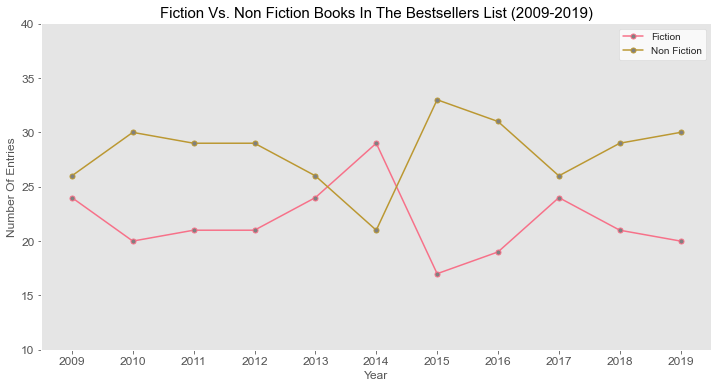

In [11]:
books = df.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='grey',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Entries')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)',fontdict={'size':15})
plt.grid(0)

plt.show()

We can also use data visualization to see that Non Fiction enteries had been more common than Fiction entries through the years 2009-2019.

The only except to this rule is the year 2014.

# Thanks for reading.

## By the end of this I hope that:
### 1. this was a brief and good introduction to the power of data exploration and data visualization.
### 2. The reader had learned at least one new thing from reading this jupyter notebook.